In [1]:
# Import NumPy library for numerical operations and linear algebra
import numpy as np  

# Import Pandas library for data manipulation and reading CSV files
import pandas as pd  

# Import os module to interact with the operating system (file and directory handling)
import os

# Traverse the directory tree starting from '/kaggle/input'
for dirname, subdirs, _ in os.walk('/kaggle/input'):
    # Print the current directory path found in the traversal
    print(dirname)


/kaggle/input
/kaggle/input/classification
/kaggle/input/classification/val
/kaggle/input/classification/val/7
/kaggle/input/classification/val/47
/kaggle/input/classification/val/17
/kaggle/input/classification/val/81
/kaggle/input/classification/val/19
/kaggle/input/classification/val/22
/kaggle/input/classification/val/2
/kaggle/input/classification/val/35
/kaggle/input/classification/val/92
/kaggle/input/classification/val/50
/kaggle/input/classification/val/23
/kaggle/input/classification/val/87
/kaggle/input/classification/val/10
/kaggle/input/classification/val/5
/kaggle/input/classification/val/61
/kaggle/input/classification/val/36
/kaggle/input/classification/val/20
/kaggle/input/classification/val/45
/kaggle/input/classification/val/60
/kaggle/input/classification/val/27
/kaggle/input/classification/val/64
/kaggle/input/classification/val/41
/kaggle/input/classification/val/89
/kaggle/input/classification/val/39
/kaggle/input/classification/val/32
/kaggle/input/classificatio

In [2]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import seaborn as sns

2024-12-01 15:28:44.553092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-01 15:28:44.553248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-01 15:28:44.693740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load class labels
f = open('/kaggle/input/ip02-dataset/classes.txt')
label = []
name = []
for line in f.readlines():
    label.append(int(line.split()[0]))
    name.append(' '.join(line.split()[1:]))
classes = pd.DataFrame([label, name]).T
classes.columns = ['label', 'name']

In [4]:
# Load train, validation, and test data
train_df = pd.read_csv('/kaggle/input/ip02-dataset/train.txt', sep=' ', header=None, engine='python')
train_df.columns = ['image_path', 'label']

test_df = pd.read_csv('../input/ip02-dataset/test.txt', sep=' ', header=None, engine='python')
test_df.columns = ['image_path', 'label']

val_df = pd.read_csv('../input/ip02-dataset/val.txt', sep=' ', header=None, engine='python')
val_df.columns = ['image_path', 'label']

In [7]:
def get_lable(num):
    return class_filter.loc[class_filter["label"] ==num,"name"].values[0]

get_lable(15)

'grub'

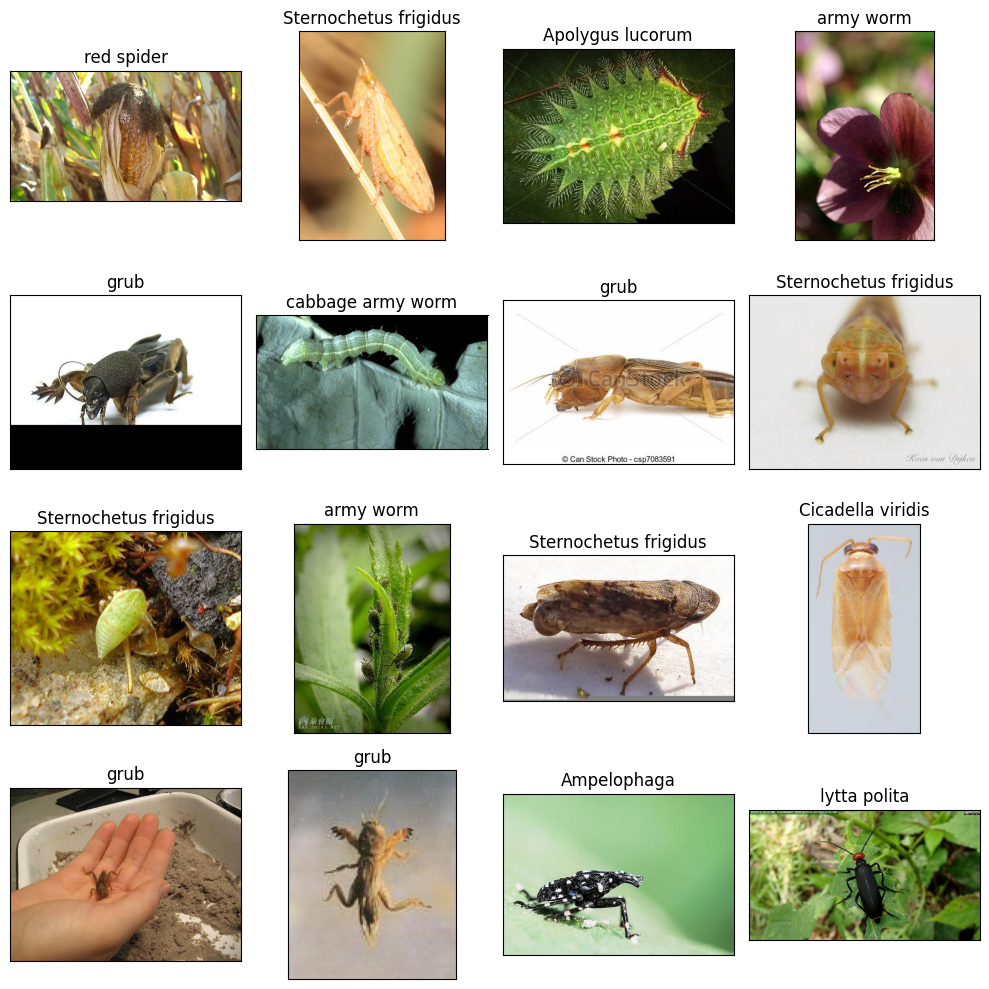

In [8]:
# Display random images
random_index = np.random.randint(0, len(train_df_img.label), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):    
    ax.imshow(plt.imread(train_df_img.image_fullpath[random_index[i]]))
    ax.set_title(get_lable(train_df_img.label[random_index[i]]))
plt.tight_layout()
plt.show()

In [9]:
train_df_img['label'] = train_df_img['label'].astype(str)
val_df_img['label'] = val_df_img['label'].astype(str)
test_df_img['label'] = test_df_img['label'].astype(str)

In [ ]:
# Parameters
IMAGE_SIZE = 224  # Custom size
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 102  # Number of classes

In [ ]:

# Create Imagedata generators for training
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    zoom_range=[.8, 1],
    channel_shift_range=30,
    fill_mode='reflect')

test_datagen = ImageDataGenerator(rescale = 1/255)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df_img,
    x_col='image_fullpath',
    y_col='label',
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
    
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df_img,
    x_col='image_fullpath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_gen= valid_datagen.flow_from_dataframe(
    dataframe=val_df_img,
    x_col='image_fullpath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)
STEP_SIZE_TRAIN = train_gen.n //train_gen.batch_size 
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size 

Found 8972 validated image filenames belonging to 10 classes.
Found 17926 validated image filenames belonging to 10 classes.
Found 2984 validated image filenames belonging to 10 classes.


In [12]:
# Define the ResNet model
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model = ResNet50(include_top=False, input_tensor=input_tensor, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
#checkpoint = ModelCheckpoint('resnet50_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True, verbose = 1)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [13]:
# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=EPOCHS,
    validation_data=valid_gen,
    validation_steps=STEP_SIZE_VALID,
    callbacks=[early_stopping_callbacks]
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/560 ━━━━━━━━━━━━━━━━━━━━ 11:02:53 71s/step - accuracy: 0.0625 - loss: 2.7219

I0000 00:00:1733067033.459833      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


560/560 ━━━━━━━━━━━━━━━━━━━━ 410s 606ms/step - accuracy: 0.5740 - loss: 1.3001 - val_accuracy: 0.2608 - val_loss: 2.2618
Epoch 2/50
  1/560 ━━━━━━━━━━━━━━━━━━━━ 1:26 154ms/step - accuracy: 0.8125 - loss: 0.9109

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8125 - loss: 0.9109 - val_accuracy: 0.2500 - val_loss: 1.5590
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 229s 404ms/step - accuracy: 0.7937 - loss: 0.6533 - val_accuracy: 0.7688 - val_loss: 0.7177
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8750 - loss: 0.3514 - val_accuracy: 0.8750 - val_loss: 0.3311
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 228s 402ms/step - accuracy: 0.8426 - loss: 0.4958 - val_accuracy: 0.7866 - val_loss: 0.6988
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.9062 - loss: 0.3908 - val_accuracy: 1.0000 - val_loss: 0.1626
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 228s 401ms/step - accuracy: 0.8623 - loss: 0.4292 - val_accuracy: 0.8038 - val_loss: 0.6377
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8438 - loss: 0.3465 - val_accuracy: 1.0000 - val_loss: 0.0265
Epoch 9/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 227s 401ms/step - accuracy: 0.8809 - loss: 0.3718 - val_a

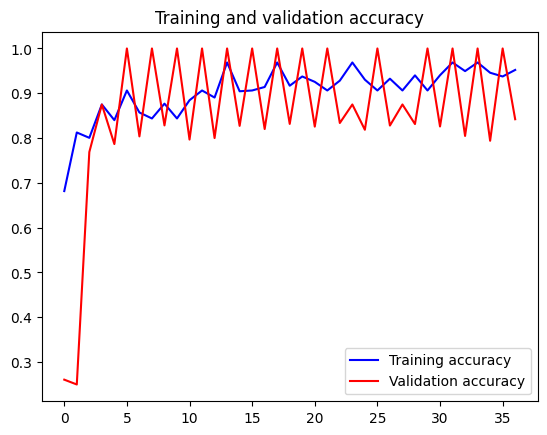

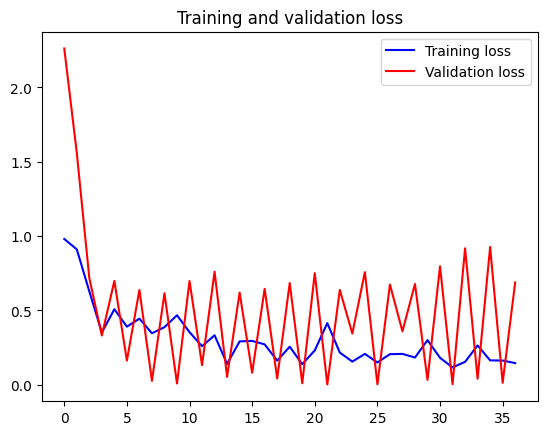

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
# Evaluate the model(Correction Test accuracy)
loss, accuracy = model.evaluate(test_gen)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

281/281 ━━━━━━━━━━━━━━━━━━━━ 74s 264ms/step - accuracy: 0.8230 - loss: 0.7521
Test accuracy: 82.91%


In [16]:
# Save the model
model.save('resnet50_model.h5')  # Save the entire model to a file
print("Model saved as 'resnet50_model.h5'")


Model saved as 'resnet50_model.h5'
